In [117]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [118]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.2784361 ]
 [ 0.8134901 ]
 [ 0.29606402]], shape=(3, 1), dtype=float32)


In [119]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.35078168]
 [0.8608726 ]
 [0.38319957]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [120]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [121]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.11081515],
       [-0.0936546 ],
       [ 0.62029284]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [122]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [123]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [124]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [155]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
print(e)
e *= d
print(e)
b

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [126]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [127]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [128]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [129]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [154]:
positive_samples

array([[ 3.50464806, -0.48981   ],
       [ 2.81522449,  0.05746302],
       [ 2.70488965,  1.45311518],
       ...,
       [ 3.22606883,  0.73280143],
       [ 2.56891164,  0.99423007],
       [ 2.78498356,  0.11037597]])

**Stacking the two classes into an array with shape (2000, 2)**

In [131]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32) # vertically stack data

In [132]:
inputs.shape # we made 2 1,000 samples

(2000, 2)

**Generating the corresponding targets (0 and 1)**

In [133]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32"))) # z value with first 0 for 1000, and 1 for 1000

**Plotting the two point classes**

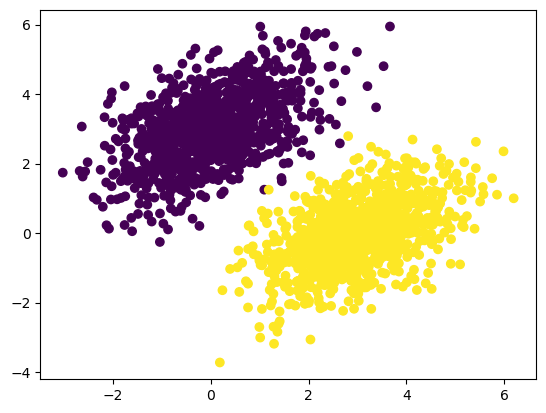

In [134]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show() # if we include target variable, we can visualize 3 dim


**Creating the linear classifier variables**

In [135]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,))) # Wx+b, w_1x_1+w_2x_2+b

**The forward pass function**

In [136]:
def model(inputs):
    return tf.matmul(inputs, W) + b # palne in 3dim space

**The mean squared error loss function**

In [137]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses) # simple loss fo rlinear regression, if we use variaous value, in example, z is all 0 and 1 other than that, setting is almost same to linear caese

**The training step function**

In [138]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)# mkae predi
        loss = square_loss(targets, predictions) # mke loss from our model, sEL
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])# gradient
    W.assign_sub(grad_loss_wrt_W * learning_rate)# updata w
    b.assign_sub(grad_loss_wrt_b * learning_rate)# update b
    return loss # when we solve lienar regression, we can solve directly, but this is not, we use gradient optimier, ma

**The batch training loop**

Loss at step 0: 0.5377
Loss at step 1: 0.0813
Loss at step 2: 0.0760
Loss at step 3: 0.0714
Loss at step 4: 0.0673
Loss at step 5: 0.0636


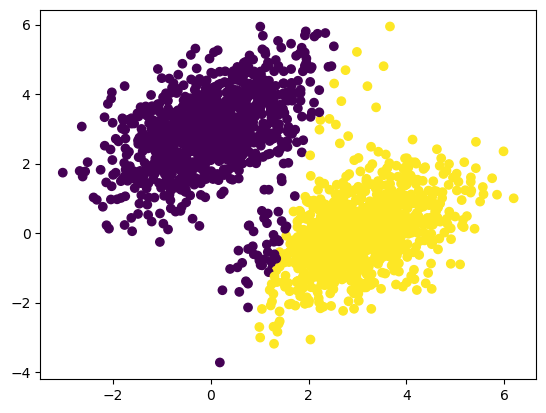

Loss at step 6: 0.0602
Loss at step 7: 0.0571
Loss at step 8: 0.0542
Loss at step 9: 0.0516
Loss at step 10: 0.0493


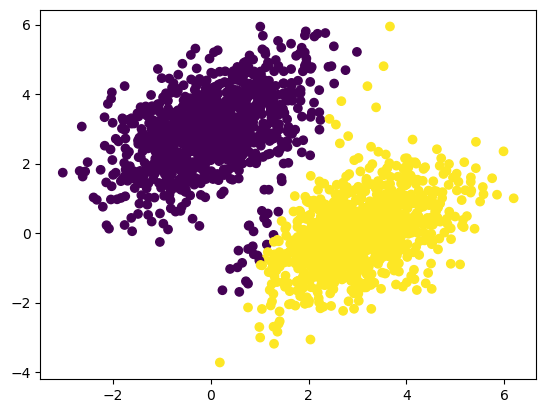

Loss at step 11: 0.0471
Loss at step 12: 0.0452
Loss at step 13: 0.0434
Loss at step 14: 0.0417
Loss at step 15: 0.0402


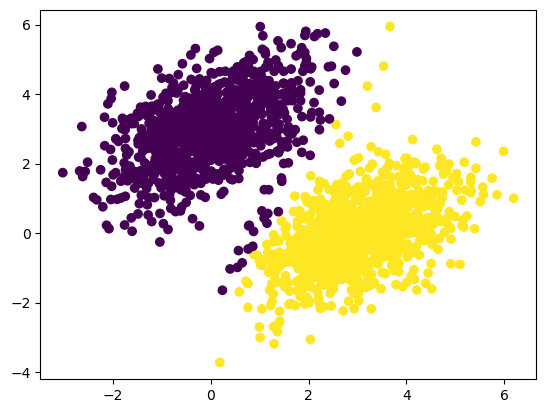

Loss at step 16: 0.0389
Loss at step 17: 0.0376
Loss at step 18: 0.0365
Loss at step 19: 0.0355
Loss at step 20: 0.0345


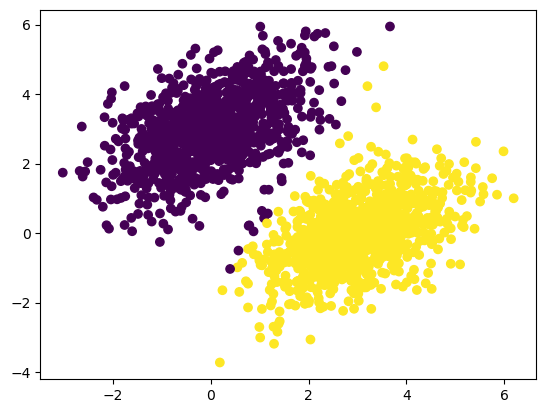

Loss at step 21: 0.0336
Loss at step 22: 0.0329
Loss at step 23: 0.0321
Loss at step 24: 0.0315
Loss at step 25: 0.0309
Loss at step 26: 0.0303
Loss at step 27: 0.0298
Loss at step 28: 0.0294
Loss at step 29: 0.0290
Loss at step 30: 0.0286
Loss at step 31: 0.0283
Loss at step 32: 0.0279
Loss at step 33: 0.0277
Loss at step 34: 0.0274
Loss at step 35: 0.0271
Loss at step 36: 0.0269
Loss at step 37: 0.0267
Loss at step 38: 0.0266
Loss at step 39: 0.0264


In [139]:
for step in range(40): # about 40 steps, loss value decres
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")
    if step in [5, 10, 15, 20]:
        predictions = model(inputs) # we can mek the predittion based on our prediction
        plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
        plt.show()# not original data, it;'s predicted values polot

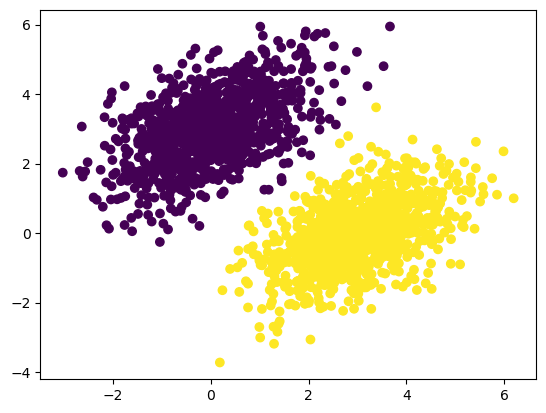

In [140]:
predictions = model(inputs) # we can mek the predittion based on our prediction
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()# not original data, it;'s predicted values polot

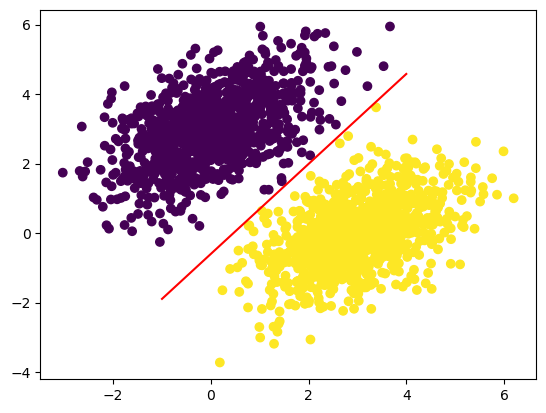

In [141]:
x = np.linspace(-1, 4, 100) # se can draw line for classifying 2 groups
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [142]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [143]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [144]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [145]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [146]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [147]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [148]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [149]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.4727 - loss: 17.8185  
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.4900 - loss: 16.6780 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.4779 - loss: 16.6967
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.4754 - loss: 16.0345 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.4596 - loss: 16.1156


In [150]:
history.history

{'binary_accuracy': [0.4690000116825104,
  0.46799999475479126,
  0.4675000011920929,
  0.4675000011920929,
  0.46549999713897705],
 'loss': [17.838115692138672,
  17.196548461914062,
  16.659055709838867,
  16.140378952026367,
  15.634469032287598]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [151]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.9540 - loss: 0.9821 - val_binary_accuracy: 0.9817 - val_loss: 0.0592
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9445 - loss: 0.0808 - val_binary_accuracy: 0.9917 - val_loss: 0.0325
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9698 - loss: 0.0698 - val_binary_accuracy: 0.9533 - val_loss: 0.0777
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9641 - loss: 0.0689 - val_binary_accuracy: 0.7350 - val_loss: 0.3484
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.9479 - loss: 0.0878 - val_binary_accuracy: 0.9800 - val_loss: 0.0462


### Inference: Using a model after training

In [152]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.853572  ]
 [1.099786  ]
 [0.03003544]
 [0.23477495]
 [1.228015  ]
 [1.0115688 ]
 [0.3424948 ]
 [0.27023268]
 [0.19552141]
 [0.01894015]]


## Summary